<a href="https://colab.research.google.com/github/HemaGarima/Machine-Learning/blob/master/tensorflow_c1_w2_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploring the fashion MNIST Dataset

In [1]:
import tensorflow as tf
print(tf.__version__)

2.17.0


## Label     Description
-  0         T-shirt/top
-  1         Trouser
-  2         Pullover
-  3         Dress
-  4         Coat
-  5         Sandal
-  6         Shirt
-  7         Sneaker
-  8         Bag
-  9         Ankle Boot

In [2]:
# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
(training_images , training_labels) , (test_images , test_labels) = fmnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
training_images.shape

(60000, 28, 28)

Label : 9

Image pixel array : 
 [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

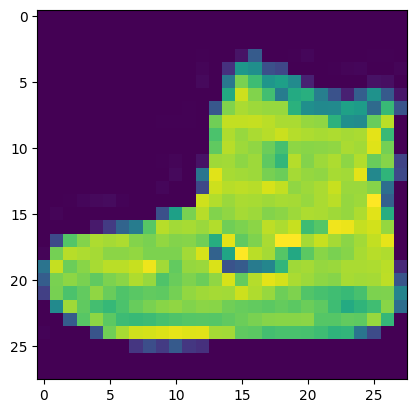

In [9]:
index = 0
# Set number of characters per row when printing
np.set_printoptions(linewidth = 320)

# Print the label and image
print(f'Label : {training_labels[index]}')
print(f'\nImage pixel array : \n {training_images[index]}\n')

# Visualize the image
plt.imshow(training_images[index])

In [10]:
# Normalize the pixel values of the train and test images
training_images = training_images / 255.0
test_images = test_images /255.0

In [11]:
# Build the classification model

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(128 , activation = tf.nn.relu) , tf.keras.layers.Dense(10 , activation = tf.nn.softmax)])

In [12]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0 , 3.0 , 4.0 , 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function : {inputs.numpy()}')

input to softmax function : [[1. 3. 4. 2.]]


In [13]:
# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function : {outputs.numpy()}')

output of softmax function : [[0.0320586  0.23688282 0.64391426 0.08714432]]


In [14]:
# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs : {sum}')

sum of outputs : 1.0


In [15]:
# Get the index with highest value
prediction = np.argmax(outputs)
print(f'Class with highest probability : {prediction}')

Class with highest probability : 2


In [19]:
model.compile(optimizer = tf.optimizers.Adam() , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [20]:
model.fit(training_images , training_labels , epochs = 5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.7819 - loss: 0.6301
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 3ms/step - accuracy: 0.8619 - loss: 0.3870
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8769 - loss: 0.3386
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8854 - loss: 0.3148
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8883 - loss: 0.3017


In [21]:
model.evaluate(test_images , test_labels)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8799 - loss: 0.3486


[0.35048606991767883, 0.8787999749183655]

### Exercise 1 :

In [22]:
classifications = model.predict(test_images)
print(classifications[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[3.4596203e-05 1.0608347e-06 4.2980814e-06 1.6157152e-05 4.3986965e-05 2.0357626e-02 1.6786909e-05 2.7165815e-01 5.6439708e-04 7.0730287e-01]


In [23]:
print(test_labels[0])

9


### Exercise 2 :

In [26]:
mnist = tf.keras.datasets.mnist
(training_images , training_labels) , (test_images , test_labels) = mnist.load_data()
training_images = training_images/255.0
test_images = test_images/255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(1024 , activation = tf.nn.relu) , tf.keras.layers.Dense(10,activation = tf.nn.softmax)])
model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy')
model.fit(training_images , training_labels , epochs = 5)
model.evaluate(test_images , test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - loss: 0.3133
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 0.0763
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - loss: 0.0445
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 13ms/step - loss: 0.0334
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 41s 13ms/step - loss: 0.0257
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0819
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
[2.34256603e-12 6.28369079e-10 3.90619137e-09 2.98731038e-07 5.20816506e-12 6.55865251e-10 5.50858025e-13 9.99999464e-01 2.66135568e-11 1.18565396e-07]
7


### Exercise 3 :

In [29]:
mnist = tf.keras.datasets.mnist
(training_images , training_labels) , (test_images , test_labels) = mnist.load_data()
training_images = training_images/255.0
test_images = test_images/255.0
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),tf.keras.layers.Dense(64 , activation = tf.nn.relu) , tf.keras.layers.Dense(10 , activation = tf.nn.softmax)])
model.compile(optimizer = 'adam' , loss = 'sparse_categorical_crossentropy')
model.fit(training_images , training_labels , epochs = 5)
model.evaluate(test_images , test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - loss: 0.4931
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.1571
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.1093
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.0825
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0733
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.0970
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
[4.3563995e-07 1.6229089e-07 1.3198706e-04 7.5501908e-04 1.6390829e-10 1.1464490e-06 6.4005945e-12 9.9909377e-01 2.0386738e-06 1.5521095e-05]
7


### Exercise : 4

In [30]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(64, activation=tf.nn.relu),
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax) # Try experimenting with this layer
                                  ])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.4950
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.1586
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - loss: 0.1076
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - loss: 0.0821
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0659
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1009
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[3.4153452e-08 9.4247961e-09 4.5361589e-06 3.3260949e-03 8.8050517e-10 5.9342551e-07 3.2032460e-12 9.9665397e-01 3.2793378e-06 1.1504957e-05]
7


### Exerice : 5

In [31]:
# Try 15 epochs -- you'll probably get a model with a much better loss than the one with 5
# Try 30 epochs -- you might see the loss value stops decreasing and sometimes increases.

In [32]:
# 1. splitting the data into training and test
# 2. normalizing the data
# 3. Making a neural network model with different layers
# 4. compiling the model
# 5. fitting the model with training dataset
# 6. evaluating the model with the test dataset
# 7. predicting the result

### Exercise : 7 - callbacks

In [33]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self , epoch , logs = {}):
    if(logs.get('accuracy') >= 0.6):
      print("\n Reached 60% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=5, callbacks=[callbacks])

Epoch 1/5
1870/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7912 - loss: 0.5949
 Reached 60% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.7913 - loss: 0.5945
